# The Traveling Salesman Problem (TSP)

Consider a set if $n$ cities $S =\{ 1, 2, \ldots, n \}$.

A salesman must visit each of $n$ cities exactly once and then return to his starting point.

The time taken to travel from city $i$ to city $j$ is $c_{ij}, \ i \not= j$.

Find the order in which he should make his tour so as to finish as quickcly as possible.

This problem arises in a multitude of forms:
- a truck driver has a list of clients he must visit on a given day.
- a machine must place modules on printed circuit boards.
- a stacker crane must pick up and depose crates.

### TSP formulation as a BIP

The variables:

- $x_{ij} = 1$ if the salesman goes directly from town $i$ to town $j$, and $x_{ij}= 0$ otherwise, for $i \not= j$.

The constraints:

- He leaves town $i$ exactly once:
$$
\sum_{j:j\not=i} x_{ij} = 1 \quad for \quad i=1, \ldots, n
$$

- He arrives at town $j$ exactly once:
$$
\sum_{i:i\not=j} x_{ij} = 1 \quad for \quad j=1, \ldots, n
$$

So far the are the constraints of the assigment problem.

A solution to the assigment problem might given a solution of the form a set of disconnected subtours.

To eliminate these solutions, we need more constraints that guarantee connectivity by imposing that the salesman must pass from one set of cities to another: cut-set constraints or subtour eliminations constraints.

- Cut-set constraints:
$$
\sum_{i \in S} \sum_{j \notin S} x_{ij} \geq 1, \quad S \subset N, \quad S \not= \emptyset
$$

- subtour elimination contraints:
$$
\sum_{i \in S} \sum_{j \in S} x_{ij} \leq | S | - 1, \quad S \subset N, \quad 2 \leq | S | \leq n -1 
$$

- Miller-Tucker-Zemlin (MTZ) subtour elimination constraints

for each $i \in V$ let $u_i \in \mathbb{R}_{+}$ be an auxiliary variable.

The subtour elimination constraints work by labeling the order in which the nodes are visited. 

The variable $u$ be the rank of each node in order of visits. 

Then $x_{ij} = 1$ if $u+i + 1 = u_j$
​
$$
u_i + 1 - u_j  \leq (n-1)(1 - x_{ij}) \quad \forall \ i,j \in V 
$$

MTZ as indicator constraint

If $x_{ijk} = 1$ then $u_i +1 = u_j$ for $i,j \in V$


The variables are 0-1:

$$
x_{ij} \in \{ 0, 1 \}, \quad i=1, 2, \ldots, n, \quad j=1, 2, \ldots, n, \quad i \not= j.
$$

The objective function:

$$
\min \ \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij} x_{ij}
$$

### Complexity

Starting at city 1, the salesman has $n$-1 choices.

For the next choice $n$-2 cities are possible, and so on.

Thus there ares ($n$-1)! feasible tours.

The tabel show how rapidly certain functions grow. 

| $n$ | $n$! |
|-----|------|
| 10  |$3.6 \times 10^{6}$ |
| 100 |$9.33 \times 10^{157}$ |
| 1000 | $4.02 \times 10^{2567}$ |

In [164]:
import gurobipy as gp
import numpy as np
import matplotlib.pyplot as plt

In [176]:
# criando os vértices
n = 21
vertices = [i for i in range(n)]

In [177]:
# criando os arcos
arcos = [(i,j) for i in vertices for j in vertices if i!=j]

In [178]:
# coordenadas
np.random.seed(0)
X = np.random.random(n) * 100
Y = np.random.random(n) * 100

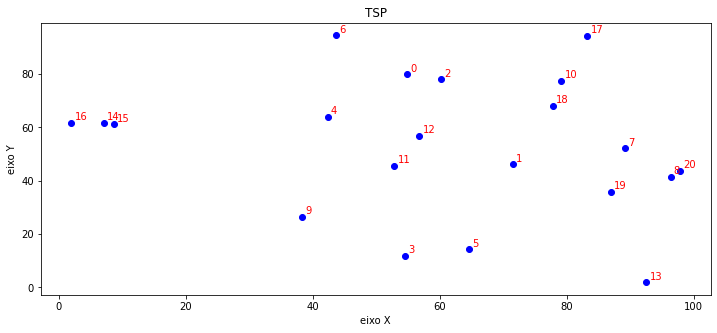

In [185]:
# distancias
c = {(i,j): np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in vertices for j in vertices if i!=j}

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for n in range(len(X)):
    plt.annotate(str(n), xy=(X[n],Y[n]), xytext = (X[n]+0.5, Y[n]+1), color='red')

plt.xlabel("eixo X")
plt.ylabel("eixo Y")
plt.title("TSP")
plt.show()

In [186]:
# model
model = gp.Model("tsp_mzt")

# variables
x = model.addVars(arcos, vtype = gp.GRB.BINARY, name = 'x')
u = model.addVars(vertices, vtype = gp.GRB.CONTINUOUS, name = 'u')

# objective
model.setObjective(gp.quicksum(c[n] * x[n] for n in arcos), gp.GRB.MINIMIZE)

# constraints
model.addConstrs(gp.quicksum(x[i,j] for j in vertices if j!=i) == 1 for i in vertices)
model.addConstrs(gp.quicksum(x[i,j] for i in vertices if i!=j) == 1 for j in vertices)
model.addConstrs((x[i,j] == 1) >> (u[i]+1 == u[j]) for i,j in arcos if j!=0)

# parameters
model.Params.timeLimit = 600
model.Params.MIPGap = 0.001

# solve
model.optimize()

Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.001
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 42 rows, 441 columns and 840 nonzeros
Model fingerprint: 0x59c6fd3e
Model has 400 general constraints
Variable types: 21 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 400 rows and 400 columns
Presolve time: 0.01s
Presolved: 442 rows, 841 columns, 1850 nonzeros
Presolved model has 400 SOS constraint(s)
Variable types: 421 continuous, 420 integer (420 binary)

Root relaxation: objective 3.267793e+02, 64 iterations, 0.00 seconds (0.00 work u

*  452   308              27     445.4154134  330.71686  25.8%   1.5    0s
*  657   422              26     437.2873657  330.71686  24.4%   1.5    0s
H  719   496                     435.9919358  330.71686  24.1%   1.5    0s
H 1149   656                     435.5228635  330.71686  24.1%   1.5    0s
H 1469   680                     429.4194107  330.71686  23.0%   1.6    0s
H 1585   709                     411.1233774  330.71686  19.6%   1.6    0s
H 1629   669                     408.1433116  330.71686  19.0%   1.6    0s
H 2944   979                     398.9740728  330.94329  17.1%   1.5    0s
* 5496  1960              35     396.5841311  334.58758  15.6%   1.5    0s
H 6613  2112                     393.6040652  338.32922  14.0%   1.5    0s
*11764  3472              45     393.3226926  342.41388  12.9%   1.5    1s
*11765  3452              45     392.2594072  342.41388  12.7%   1.5    1s
H14023  3898                     389.2793413  342.90609  11.9%   1.5    1s
 103434 16329 infeasible 

In [187]:
# solutions
print("optimal:", str(round(model.objVal,2)))

for v in model.getVars():
    if v.x > 0.9:
        print(str(v.VarName)+"="+str(v.x))

optimal: 389.28
x[0,6]=1.0
x[1,18]=1.0
x[2,0]=1.0
x[3,5]=1.0
x[4,12]=1.0
x[5,13]=1.0
x[6,16]=1.0
x[7,1]=1.0
x[8,20]=1.0
x[9,3]=1.0
x[10,17]=1.0
x[11,9]=1.0
x[12,11]=1.0
x[13,19]=1.0
x[14,15]=1.0
x[15,4]=1.0
x[16,14]=1.0
x[17,2]=1.0
x[18,10]=1.0
x[19,8]=1.0
x[20,7]=1.0
u[1]=15.999999999999998
u[2]=20.0
u[3]=8.999999999999998
u[4]=5.000000000000001
u[5]=9.999999999999998
u[6]=0.9999999999999998
u[7]=14.999999999999998
u[8]=12.999999999999998
u[9]=7.999999999999998
u[10]=18.0
u[11]=6.999999999999997
u[12]=5.999999999999997
u[13]=10.999999999999998
u[14]=3.0
u[15]=4.0
u[16]=1.9999999999999998
u[17]=19.0
u[18]=17.0
u[19]=11.999999999999998
u[20]=13.999999999999998


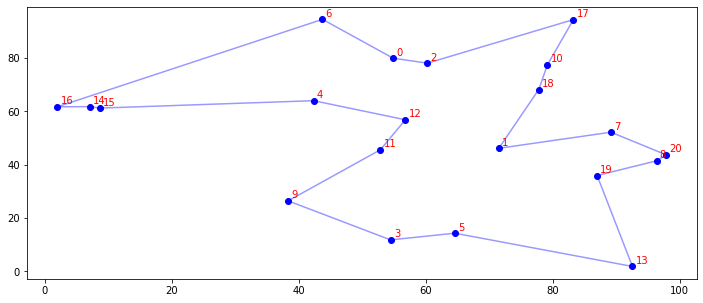

In [188]:
# grafic

arcos_ativos = [i for i in arcos if x[i].x > 0.9]
#print(arcos_ativos)

# print
plt.figure(figsize = (12,5))
plt.xlabel
plt.ylabel

plt.scatter(x=X, y=Y, color='blue', zorder=1)

# line between arcos
for i,j in arcos_ativos:
    plt.plot([X[i],X[j]],[Y[i],Y[j]], color='b', alpha=0.4, zorder=0)

for n in range(len(X)):
    plt.annotate(str(n), xy=(X[n],Y[n]), xytext=(X[n]+0.5, Y[n]+1), color='red')

plt.show()

### TSP Formulation

- Sets and Indices

$N = \{1,2,\ldots,n \}$: set onf cities

$i, j \in N $: indices and set of cities.

$\text{E}= \{(i,j) \in N \times N \}$: set of allowed pairings

$S \subset N$: a subset of the set cities.

$G = (N, E)$: a graph where the set $N$ defines the set of nodes and the set $E$ defines the set of edges. 

- Parameters 

$c_{i, j} \in \mathbb{R}_+$: distance from city $i$ to city $j$, for all $(i, j) \in E$. 

Notice that the distance from city $i$ to city $j$ is the same as the distance from city $j$ to city $i$, i.e. $c_{i,j} = c_{j,i}$. 

For this reason, this TSP is also called the symmetric Traveling Salesman Problem.

-  Decision variables

$x_{i, j} \in \{0, 1\}$: this variable is equal to 1, if we decide to connect city $i$ with city $j$. Otherwise, the decision variable is equal to zero.

- Objective function

**Shortest Route**. Minimize the total distance of a route. 
A route is a sequence of cities where the salesperson visits each city only once and returns to the starting capital city.

\begin{equation}
\text{min} \quad z = \sum_{(i,j) \in \text{E}} c_{i,j} \cdot x_{i,j}
\tag{0}
\end{equation}

- Constraints 

**Symmetry constraints**.
For each edge $(i,j)$, ensure that the city $i$ and $j$ are connected, if the former is visited immediately before or after visiting the latter.

\begin{equation}
x_{i, j} = x_{j, i} \quad \forall (i, j) \in E
\tag{1}
\end{equation}

**Entering and leaving a city**. 
For each city $i$, ensure that this city is connected to two other cities. 

\begin{equation}
\sum_{(i,j) \in \text{E}} x_{i,j} = 2, \quad \forall i \in N
\tag{2}
\end{equation}

**Subtour elimination**. 
These constraints ensure that for any subset of cities $S$ of the set of $N$, there is no cycle. 
That is, there is no route that visits all the cities in the subset and returns to the origin city.

\begin{equation}
\sum_{(i \neq j) \in S} x_{i,j} \leq |S|-1, \quad \forall S \subset N, \quad S \not= \emptyset
\tag{3}
\end{equation}

**Remark**. In general, if the number of cities of the TSP is $n$, then the possible number of routes is n\!.
Since there are an exponential number of constraints ($2^{n} - 2$) to eliminate cycles, we use lazy constraints to dynamically eliminate those cycles. 

### Lazy Constraints

The basic idea of **Lazy Constraints** is to initially formulate the problem only with the most essential constraints, omitting those that are only rarely violated. 

These other constraints are checked and added one-by-one to the model only if the current solution violates any of them. 

In other words, some constraints are generated in a lazy fashion, i.e. the constraint is added to the model only if the solution violates it.

Lazy constraints have to be enabled by setting model parameter ```lazyConstraints``` to 1.

```
model = g.Model()
model.Params.lazyConstraints = 1
```

To define a callback, create a function that accepts two arguments: ```model``` and ```where```. 
Thecallback is then passed to model when calling ```optimize()```.

```
def my_callback(model, where):
    # Callback is called when some event occur. The type of event is
    # distinguished using argument ’’where’’.
    # In this case, we want to perform something when an integer
    # solution is found, which corresponds to ’’GRB.Callback.MIPSOL’’.
    if where == GRB.Callback.MIPSOL:
        # TODO : your code here ...
        # Get the value of variable x[i,j] from the solution .
        # You may also pass a list of variables to the method .
        value = model.cbGetSolution(x[i,j])
        # Add lazy constraint to model.
        model.cbLazy(...)
        
model.optimize(my_callback)
```

### Code

Consider a salesperson that needs to visit customers at each state capital of the continental US. 

The salesperson wants to identify the shortest route that goes to all the state capitals.

This modeling example requires the following libraries that are not part of the standard Python distribution:
* **folium**: to create maps.
* **gurobipy**: provides Gurobi algorithms to solve MIP models.


### Reading Input Data

The capital names and coordinates are read from a json file.

JSON: stands for JavaScript Object Notation, is a text format for storing and transporting data, is "self-describing" and easy to understand.

In [3]:
import json

# Read capital names and coordinates from json file
capitals_json = json.load(open('instances/capitals.json'))
capitals = []
coordinates = {}
for state in capitals_json:
    if state not in ['AK', 'HI']:
      capital = capitals_json[state]['capital']
      capitals.append(capital)
      coordinates[capital] = (float(capitals_json[state]['lat']), float(capitals_json[state]['long']))

### Data computation

The following function calculates the distance for each pair of state capitals. 

Since we are solving the _symmetric_ traveling salesman problem, we use _combinations_ of cities.

In [4]:
import math
from itertools import combinations

# Compute pairwise distance matrix

def distance(x, y):
    c1 = coordinates[x]
    c2 = coordinates[y]
    diff = (c1[0]-c2[0], c1[1]-c2[1])
    return math.sqrt(diff[0]*diff[0]+diff[1]*diff[1])

dist = {(c1, c2): distance(c1, c2) for c1, c2 in combinations(capitals, 2)}

### Model Code

We now write the model for the TSP, by defining decision variables, constraints, and objective function. 

Because this is the _symmetric_ traveling salesman problem, we can make it more efficient by setting the _object_ x[j,i] to x[i,j], instead of a constraint.

In [11]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model()

# Variables: is city 'i' adjacent to city 'j' on the tour?
vars = model.addVars(dist.keys(), obj=dist, vtype=GRB.BINARY, name='x')

# Symmetric direction: Copy the object
for i, j in vars.keys():
    vars[j, i] = vars[i, j]  # edge in opposite direction

# Constraints: two edges incident to each city
cons = model.addConstrs(vars.sum(c, '*') == 2 for c in capitals)

### Callback Definition

Subtour constraints prevent multiple loops in a TSP tour. 

Because there are an exponential number of these constraints, we don't want to add them all to the model. 

Instead, we use a callback function to find violated subtour constraints and add them to the model as lazy constraints.

In [12]:
# Given a tuplelist of edges, find the shortest subtour
def subtour(edges):
    unvisited = capitals[:]
    cycle = capitals[:] # Dummy - guaranteed to be replaced
    while unvisited:  # true if list is non-empty
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i, j in edges.select(current, '*') if j in unvisited]
        if len(thiscycle) <= len(cycle):
            cycle = thiscycle # New shortest subtour
            
    return cycle

# Callback - use lazy constraints to eliminate sub-tours
def subtourelim(model, where):
    if where == GRB.Callback.MIPSOL:
        # make a list of edges selected in the solution
        vals = model.cbGetSolution(model._vars)
        selected = gp.tuplelist((i, j) for i, j in model._vars.keys() if vals[i, j] > 0.5)
        # find the shortest cycle in the selected edge list
        tour = subtour(selected)
        if len(tour) < len(capitals):
            # add subtour elimination constr. for every pair of cities in subtour
            model.cbLazy(gp.quicksum(model._vars[i, j] for i, j in combinations(tour, 2)) <= len(tour)-1)

## Solve the model

In [13]:
model._vars = vars
model.Params.lazyConstraints = 1
model.optimize(subtourelim)

Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-1035G1 CPU @ 1.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 48 rows, 1128 columns and 2256 nonzeros
Model fingerprint: 0x63641a38
Variable types: 0 continuous, 1128 integer (1128 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e-01, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.00s
Presolved: 48 rows, 1128 columns, 2256 nonzeros
Variable types: 0 continuous, 1128 integer (1128 binary)

Root relaxation: objective 1.611858e+02, 72 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  161.18576    0   12          -  161.1857

## Analysis

We retrieve the optimal solution of the TSP and verify that the optimal route (or tour) goes to all the cities and returns to the origin city.

In [14]:
# Retrieve solution

vals = model.getAttr('x', vars)
selected = gp.tuplelist((i, j) for i, j in vals.keys() if vals[i, j] > 0.5)

tour = subtour(selected)
assert len(tour) == len(capitals)

The optimal route is displayed in the following map.

In [15]:
# Map the solution

import folium

map = folium.Map(location=[40,-95], zoom_start = 4)

points = []
for city in tour:
  points.append(coordinates[city])
points.append(points[0])

folium.PolyLine(points).add_to(map)

map

## Conclusions

The Traveling Salesman Problem (TSP) is the most popular combinatorial optimization problem. 

This problem is very easy to explain, although it is very complicated to solve. 

The largest TSP problem solved has 85,900 cities. 

The TSP is a source of discovery for new approaches to solve complex combinatorial optimization problems and has led to many applications.

In this modeling example, we have shown how to formulate the symmetric Traveling Salesman Problem as a MIP problem. 

We also showed how to dynamically eliminate subtours by using lazy constraints. 

## References

[1] D. L. Applegate, R. E. Bixby, V. Chvatal and W. J. Cook , The Traveling Salesman Problem: A Computational Study, Princeton University Press, Princeton, 2006.

[2] http://www.math.uwaterloo.ca/tsp/index.html

[3] https://www.youtube.com/watch?v=q8nQTNvCrjE&t=35s

[4] http://www.math.uwaterloo.ca/tsp/concorde.html

[5] https://github.com/Gurobi/modeling-examples/tree/master/traveling_salesman